In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras
import pandas as pd
from sklearn.datasets import load_breast_cancer
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
cancer = load_breast_cancer()

In [5]:
df_Cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [6]:
df_Cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [7]:
x = df_Cancer.iloc[:,[0,1]]
y = df_Cancer['target']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

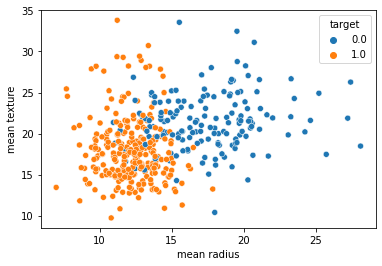

In [9]:
sns.scatterplot(x=x_train['mean radius'],y=x_train['mean texture'],hue=y_train)

In [12]:
scalar = MinMaxScaler()
scalar.fit(x_train)
x_train_scaled = scalar.transform(x_train)

scalar = MinMaxScaler()
scalar.fit(x_test)
x_test_scaled = scalar.transform(x_test)

C:\Python\Python395\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

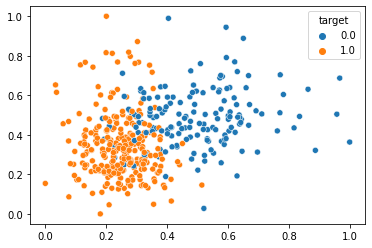

In [13]:
sns.scatterplot(x_train_scaled[:,0],x_train_scaled[:,1],hue=y_train)

In [32]:
# define and fit the final model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x_train_scaled, y_train, epochs=500, verbose=2) 

Epoch 1/500
14/14 - 1s - loss: 0.6825 - 855ms/epoch - 61ms/step
Epoch 2/500
14/14 - 0s - loss: 0.6581 - 76ms/epoch - 5ms/step
Epoch 3/500
14/14 - 0s - loss: 0.6256 - 88ms/epoch - 6ms/step
Epoch 4/500
14/14 - 0s - loss: 0.5776 - 92ms/epoch - 7ms/step
Epoch 5/500
14/14 - 0s - loss: 0.5114 - 96ms/epoch - 7ms/step
Epoch 6/500
14/14 - 0s - loss: 0.4501 - 100ms/epoch - 7ms/step
Epoch 7/500
14/14 - 0s - loss: 0.3911 - 104ms/epoch - 7ms/step
Epoch 8/500
14/14 - 0s - loss: 0.3331 - 104ms/epoch - 7ms/step
Epoch 9/500
14/14 - 0s - loss: 0.3026 - 96ms/epoch - 7ms/step
Epoch 10/500
14/14 - 0s - loss: 0.2933 - 92ms/epoch - 7ms/step
Epoch 11/500
14/14 - 0s - loss: 0.2860 - 88ms/epoch - 6ms/step
Epoch 12/500
14/14 - 0s - loss: 0.2725 - 84ms/epoch - 6ms/step
Epoch 13/500
14/14 - 0s - loss: 0.2683 - 168ms/epoch - 12ms/step
Epoch 14/500
14/14 - 0s - loss: 0.2622 - 104ms/epoch - 7ms/step
Epoch 15/500
14/14 - 0s - loss: 0.2673 - 84ms/epoch - 6ms/step
Epoch 16/500
14/14 - 0s - loss: 0.2693 - 80ms/epoch - 6m

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 20)                60        
                                                                 
 dense_8 (Dense)             (None, 60)                1260      
                                                                 
 dense_9 (Dense)             (None, 40)                2440      
                                                                 
 dense_10 (Dense)            (None, 20)                820       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 4,601
Trainable params: 4,601
Non-trainable params: 0
_________________________________________________________________


In [34]:
y_predict = model.predict(x_test_scaled)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

cm = confusion_matrix(y_test,y_predict.round())

<AxesSubplot:>

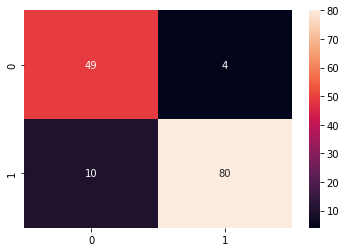

In [36]:
sns.heatmap(cm,annot=True,fmt="d")

In [37]:
print(classification_report(y_test,y_predict.round()))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.88        53
         1.0       0.95      0.89      0.92        90

    accuracy                           0.90       143
   macro avg       0.89      0.91      0.90       143
weighted avg       0.91      0.90      0.90       143



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


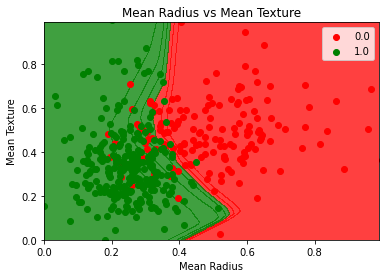

In [38]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train_scaled,y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.01),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs Mean Texture')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


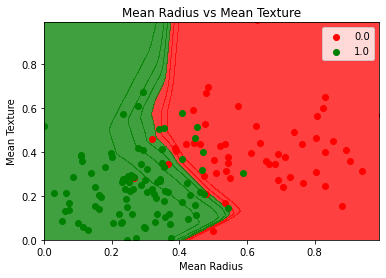

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.01),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs Mean Texture')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()